# Logistic Regression and Classification using TensorFlow

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('30_train_features.csv')
test = pd.read_csv('30_test_features.csv')

train = train.sample(frac=1)
test = test.sample(frac=1)

In [3]:
X_train = train[train.columns.difference(['OS'])].values
y_train = train['OS'].values

X_test = test[test.columns.difference(['OS'])].values
y_test = test['OS'].values

### Task 1 Binary classification

In [4]:
threshold = 300
y_train = np.array([int(i >= threshold) for i in y_train]).reshape((len(y_train),1))
y_test = np.array([int(i >= threshold) for i in y_test]).reshape((len(y_test),1))

In [5]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = [(row - mean)*(std**-1) for row in X_train]
X_train = np.column_stack((X_train, np.ones(len(X_train))))

mean = np.mean(X_test, axis=0)
std = np.std(X_test, axis=0)

X_test = [(row - mean)*(std**-1) for row in X_test]
X_test = np.column_stack((X_test, np.ones(len(X_test))))

In [6]:
num_features = X_train.shape[1]
print("Input has %.0f features including 1 bias feature"%num_features)

Input has 31 features including 1 bias feature


In [7]:
X = tf.placeholder(tf.float32, [None, num_features], name='X')
y = tf.placeholder(tf.float32, [None, 1], name='y')

In [8]:
weights = tf.Variable(tf.random_normal([num_features,1],
                                    mean=0.0,
                                    stddev=0.1,
                                    dtype=tf.float32,
                                    seed=2018,
                                    name='weights'
                                ))

In [9]:
z = tf.matmul(X, weights, name='matrix_mul')

In [10]:
iterations = 10000
# learning_rate = 0.01
learning_rate = tf.train.exponential_decay(learning_rate=0.02,
                                           global_step=1,
                                           decay_steps=len(X_train),
                                           decay_rate=0.95,
                                           staircase=True)

predictions = tf.round(tf.nn.sigmoid(z))

loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z))

optimiser = tf.train.AdamOptimizer(learning_rate)
training = optimiser.minimize(loss)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y), 'float'))

init = tf.global_variables_initializer()

In [11]:
with tf.Session() as sess:
    error = []
    sess.run(init)
    for iteration in range(iterations):
        _, new_weights, new_error = sess.run([training, weights, loss], feed_dict={X: X_train, y: y_train})
        error.append(new_error)
        if iteration in [0, 10, 20, 50, 100, 200, 500, 1000, 5000, 9999]:
            print("Training error at '%.0f' iteration : %.6f"%(iteration, new_error))
        
    print("\nTraining accuaracy : %.2f"%sess.run(accuracy, feed_dict={X: X_train, y: y_train}))
    print("Testing accuaracy : %.2f"%sess.run(accuracy, feed_dict={X: X_test, y: y_test}))

Training error at '0' iteration : 65.583786
Training error at '10' iteration : 54.164555
Training error at '20' iteration : 49.691376
Training error at '50' iteration : 44.597794
Training error at '100' iteration : 41.272640
Training error at '200' iteration : 38.825741
Training error at '500' iteration : 37.532749
Training error at '1000' iteration : 37.480042
Training error at '5000' iteration : 37.479954
Training error at '9999' iteration : 37.479980

Training accuaracy : 0.83
Testing accuaracy : 0.73


In [12]:
def plot_error(error):
    plt.plot(range(len(error)),error, color="red")
    plt.title("error vs iteration")
    plt.show()

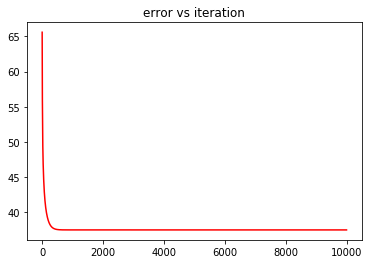

In [13]:
plot_error(error)

### <br>

### Task 2 Multiclass Classification

In [14]:
y_train = train['OS'].values
y_test = test['OS'].values

In [15]:
labels = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

y_train = np.array([labels[0] if i < 300 else labels[1] if i < 450 else labels[2] for i in y_train])
y_test = np.array([labels[0] if i < 300 else labels[1] if i < 450 else labels[2] for i in y_test])

In [16]:
X = tf.placeholder(tf.float32, [None, num_features], name='X')
y = tf.placeholder(tf.int64, [None, 3], name='y')

In [17]:
weights = tf.Variable(tf.random_normal([num_features,3],
                                    mean=0.0,
                                    stddev=0.1,
                                    dtype=tf.float32,
                                    seed=2018,
                                    name='weights'
                                ))

In [18]:
z = tf.nn.softmax(tf.matmul(X, weights, name='matrix_mul'))
# y_ = tf.reshape(tf.reduce_max(z, axis=1)

In [19]:
predictions = tf.argmax(z, axis=1)

reg = 0.7
loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z) + reg*tf.nn.l2_loss(weights))

optimiser = tf.train.AdamOptimizer(learning_rate)
training = optimiser.minimize(loss)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, tf.argmax(y, axis=1)), 'float'))

init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    error = []
    sess.run(init)
    
    for iteration in range(iterations):
        _, new_weights, new_error = sess.run([training, weights, loss], feed_dict={X: X_train, y: y_train})
        error.append(new_error)
        if iteration in [0, 10, 20, 50, 100, 200, 500, 1000, 5000, 9999]:
            print("Training error at '%.0f' iteration : %.6f"%(iteration, new_error))
        
    print("\nTraining accuaracy : %.2f"%sess.run(accuracy, feed_dict={X: X_train, y: y_train}))
    print("Testing accuaracy : %.2f"%sess.run(accuracy, feed_dict={X: X_test, y: y_test}))

Training error at '0' iteration : 143.534744
Training error at '10' iteration : 107.181587
Training error at '20' iteration : 106.928375
Training error at '50' iteration : 105.052986
Training error at '100' iteration : 105.000336
Training error at '200' iteration : 104.999931
Training error at '500' iteration : 104.999939
Training error at '1000' iteration : 104.999939
Training error at '5000' iteration : 104.999985
Training error at '9999' iteration : 105.001984

Training accuaracy : 0.58
Testing accuaracy : 0.45


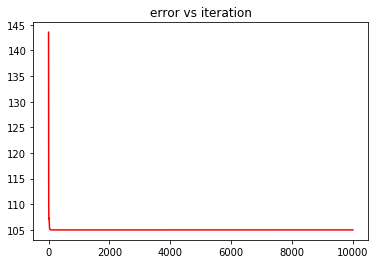

In [21]:
plot_error(error)

### <br>Linear Regression

In [22]:
y_train = train['OS'].values.reshape(98 ,1)
y_test = test['OS'].values.reshape(33 ,1)

In [23]:
X = tf.placeholder(tf.float32, [None, num_features], name='X')
y = tf.placeholder(tf.float32, [None, 1], name='y')
col = tf.placeholder(tf.float32, [None, 1], name='column')

In [24]:
weights = tf.Variable(tf.random_normal([num_features,1],
                                    mean=0.0,
                                    stddev=0.1,
                                    dtype=tf.float32,
                                    seed=2018,
                                    name='weights'
                                ))

In [25]:
z = tf.matmul(X, weights, name='matrix_mul')

In [26]:
loss = tf.nn.l2_loss(z - y)

In [27]:
learning_rate = 1

optimiser = tf.train.AdamOptimizer(learning_rate)
training = optimiser.minimize(loss)

pearson_r = tf.contrib.metrics.streaming_pearson_correlation(col, y, name='Correlation')

init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())

In [35]:
with tf.Session() as sess:
    error = []
    sess.run(init)
    
    for iteration in range(iterations):
        _, new_weights, new_error = sess.run([training, weights, loss], feed_dict={X: X_train, y: y_train})
        error.append(new_error)
        if iteration in [0, 10, 20, 50, 100, 200, 500, 1000, 5000, 9999]:
            print("Training error at '%.0f' iteration : %.6f"%(iteration, new_error))
        
    print("\nTraining error : %.2f"%sess.run(loss, feed_dict={X: X_train, y: y_train}))
    print("Test error : %.2f\n"%sess.run(loss, feed_dict={X: X_test, y: y_test}))
    
    for i in range(30):
        print("Correlation for column %.0f : %.6f"
              % (i+1, sess.run(pearson_r, feed_dict={col: X_test.T[i].reshape(33, 1), y: y_test})[0]))            

Training error at '0' iteration : 15424342.000000
Training error at '10' iteration : 13947186.000000
Training error at '20' iteration : 12967051.000000
Training error at '50' iteration : 10969852.000000
Training error at '100' iteration : 8857433.000000
Training error at '200' iteration : 6272620.500000
Training error at '500' iteration : 3484116.750000
Training error at '1000' iteration : 3157198.750000
Training error at '5000' iteration : 3156060.250000
Training error at '9999' iteration : 3156060.500000

Training error : 3156060.00
Test error : 2084341.00

Correlation for column 1 : nan
Correlation for column 2 : 0.129591
Correlation for column 3 : 0.121943
Correlation for column 4 : 0.031143
Correlation for column 5 : -0.009869
Correlation for column 6 : -0.058452
Correlation for column 7 : -0.051310
Correlation for column 8 : -0.039480
Correlation for column 9 : -0.046744
Correlation for column 10 : -0.033948
Correlation for column 11 : -0.025579
Correlation for column 12 : -0.035

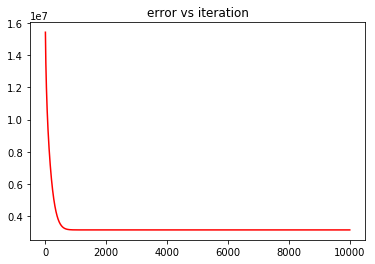

In [36]:
plot_error(error)